# CT data Visualization

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as pat
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import seaborn as sns

import cufflinks as cf
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot , iplot
#  To use plotly we need to initate it for each notebook
init_notebook_mode(connected=True)
# To use cufflinks as offline we call the below function
cf.go_offline()

%matplotlib inline

In [14]:
ct = []
with open('slice150.raw', 'rb') as f:
    while True:
        data = f.read(2)
        if not data:
            break
        #img = np.append(img,data)
        ct.append(int.from_bytes(data, byteorder='little'))
        
# Converting the data set into an array        
img1 = pd.DataFrame(np.asanyarray(ct).reshape(512,512))
img = np.asanyarray(ct).reshape(512,512)

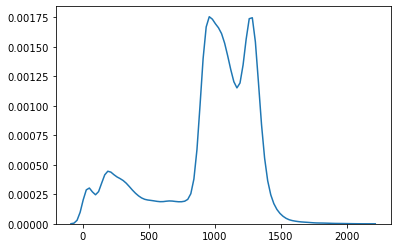

In [15]:
sns.distplot(img, kde=True, rug=False, hist=False)

In [18]:
u,c = np.unique(img,return_counts=True)

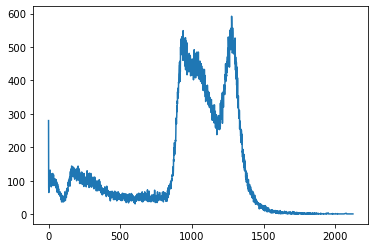

In [28]:
plt.plot(u,c)

In [20]:
u

array([   0,    1,    2, ..., 2079, 2102, 2123])

In [21]:
c

array([280,  79,  65, ...,   1,   1,   1])

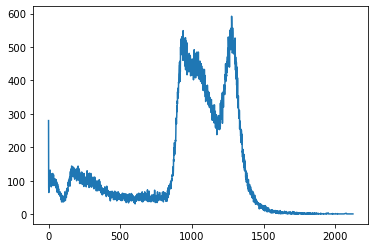

In [19]:
plt.plot(u,c)

In [11]:
len(u) , len(c)

(1924, 1924)

In [17]:
plt.lineplot(u,c)

AttributeError: module 'matplotlib.pyplot' has no attribute 'lineplot'

In [27]:
ct = []
sum = 0
val_min = 0
val_max = 0
hist = {}
with open('slice150.raw' , 'rb') as f :
    while True :
        data = f.read(2)
        if not data :
            break
        val = int.from_bytes(data , byteorder='little')
        ct.append(val)
        # Calculating the sum to determine mean
        sum = sum + val
        # Calculating the minimum value in the data set without using built function
        if val < val_min:
            val_min = val
        # Calculating the maximum value in the data set without using built function
        if val > val_max:
            val_max = val
        if val in hist.keys():
            hist[val] += 1
        else :
            hist[val] = 1

#Converting the data set into an array
# img = pd.DataFrame(np.asanyarray(ct).reshape(512 , 512))
img = np.asanyarray(ct).reshape(512 , 512)

In [32]:
from collections import OrderedDict 
hist1 = OrderedDict(sorted(hist.items()))
hist1

OrderedDict([(0, 280),
             (1, 79),
             (2, 65),
             (3, 80),
             (4, 100),
             (5, 92),
             (6, 104),
             (7, 88),
             (8, 92),
             (9, 91),
             (10, 106),
             (11, 132),
             (12, 104),
             (13, 102),
             (14, 92),
             (15, 94),
             (16, 88),
             (17, 91),
             (18, 108),
             (19, 82),
             (20, 109),
             (21, 101),
             (22, 94),
             (23, 121),
             (24, 98),
             (25, 99),
             (26, 95),
             (27, 86),
             (28, 96),
             (29, 122),
             (30, 102),
             (31, 90),
             (32, 89),
             (33, 86),
             (34, 116),
             (35, 118),
             (36, 100),
             (37, 100),
             (38, 101),
             (39, 98),
             (40, 99),
             (41, 106),
             (42, 100),
 

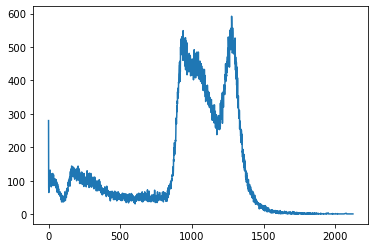

In [33]:
keys = np.array( np.fromiter(hist1.keys() , dtype = float))
vals = np.array(np.fromiter(hist1.values() , dtype = float))
plt.plot( keys, vals)


In [12]:
img

array([[1069, 1085, 1103, ...,   17,    8,   20],
       [1047, 1047, 1062, ...,    0,    4,   41],
       [1035, 1022, 1028, ...,    0,   37,   87],
       ...,
       [ 969,  990, 1024, ...,   75,  101,   93],
       [1010, 1021, 1028, ...,   37,   74,   79],
       [1034, 1021, 1009, ...,   47,   81,   94]])

In [14]:
img1.iloc[256]

0      1135
1      1122
2      1116
3      1116
4      1120
       ... 
507    1027
508     996
509     973
510     970
511     986
Name: 256, Length: 512, dtype: int32

In [17]:
img[256][:]

array([1135, 1122, 1116, 1116, 1120, 1115, 1108, 1086, 1075, 1079, 1092,
       1100, 1089, 1058, 1028, 1039, 1077, 1106, 1101, 1071, 1040, 1006,
        952,  892,  849,  821,  787,  733,  674,  629,  625,  655,  692,
        722,  753,  798,  852,  883,  881,  869,  862,  875,  882,  875,
        875,  874,  895,  919,  931,  924,  895,  876,  890,  927,  949,
        943,  944,  950,  954,  933,  896,  870,  872,  894,  908,  938,
        959,  948,  903,  891,  929,  981, 1018, 1044, 1088, 1136, 1163,
       1147, 1105, 1073, 1082, 1124, 1161, 1181, 1166, 1156, 1151, 1126,
       1105, 1104, 1120, 1139, 1166, 1180, 1195, 1231, 1270, 1269, 1233,
       1199, 1184, 1168, 1158, 1163, 1180, 1189, 1193, 1198, 1205, 1218,
       1230, 1202, 1113, 1038, 1038, 1108, 1162, 1165, 1135, 1104, 1110,
       1157, 1188, 1162, 1114, 1087, 1073, 1063, 1082, 1139, 1171, 1158,
       1131, 1122, 1138, 1156, 1175, 1163, 1145, 1149, 1170, 1195, 1197,
       1191, 1186, 1174, 1124, 1069, 1048, 1073, 10

In [ ]:
sns.distplot()

Mean is: 949.9877662658691
Variance: 134932.47904059364

In [6]:
img.min().min()

0

In [8]:
img.max().max()

2123

In [3]:
def profile_line(img):
    img[256].iplot(title='Profile Line for a single row') 

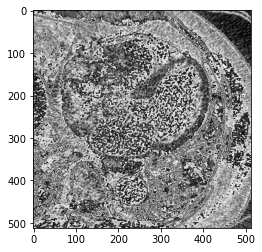

In [4]:
plt.imshow(img, cmap='gray')

In [5]:
profile_line(img)

In [6]:
np.mean(np.mean(img))

33000.57555389404

In [7]:
img.head(2)

0      1      2      3      4      5      6      7      8      9    ...  \
0  11524  15620  20228  21252  18180  15108  13060  12548  14340  16388  ...   
1   5892   5892   9732  12292  11524  10756   8964   5124   4100   6404  ...   

     502   503   504   505   506    507    508   509   510    511  
0   8960  8192  5120  3584  6912  13312  11776  4352  2048   5120  
1  10240  9216  7168  6400  8448   8448   2816     0  1024  10496  

[2 rows x 512 columns]

In [8]:
def mean_value(img):
    img_mean = 0
    for i in range (np.shape(img)[0]):
        for j in range (np.shape(img)[1]):
            img_mean = img_mean + img[j].loc[i]   
    return img_mean/(np.shape(img)[0]*np.shape(img)[1])
    

In [9]:
img_mean = mean_value(img)
img_mean

<ipython-input-8-5fbf27a94def>:5: RuntimeWarning:

overflow encountered in long_scalars



232.57555389404297

In [10]:
def variance_value(img , img_mean):
    img_variance = 0
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            img_variance = img_variance + pow((img[j].loc[i] - img_mean),2)
    
    return img_variance/(np.shape(img)[0]*np.shape(img)[1])
    

In [11]:
img_variance = variance_value(img , img_mean)
img_variance

1470917351.2618

In [12]:
max(img.max())

65286

In [13]:
img.max().max()

65286

In [14]:
img.mean().mean()

33000.57555389404

In [15]:
img.var().var()

3634855495821307.0

In [ ]:
def linear_transf(img):
    linear_transf = pd.DataFrame(0, index=range(np.shape(img)[0]), columns=range(np.shape(img)[1]))
    min_data = img.min().min()
    max_data = img.max().max()
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            linear_transf[j].iloc[i] = ((img[j].iloc[i] - min_data )/( max_data - in_data))*255
            
    return linear_transf    

In [ ]:
linear_transf = linear_transf(img)
    

In [ ]:
linear_transf.head()

In [21]:
filter = np.ones((11,11), dtype = 'int')
filter

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [22]:
#boxcar = np.zeros((np.shape(img)[0]-2,np.shape(img)[1]-2),dtype = 'int')

In [23]:
boxcar.shape

(510, 510)

In [25]:
img_dimensions = [np.shape(img)[0], np.shape(img)[1]]

512

In [26]:
filter = np.ones((11,11), dtype = 'int')
boxcar = np.zeros(((img_dimensions[0] - np.shape(filter)[0] + 1),(img_dimensions[1] - np.shape(filter)[0] + 1)),dtype = 'int')
np.shape(boxcar)


(502, 502)

In [28]:
square_data = [1,1,1,1,1,1,1,1,1,1,1]
int(512 / 2)

256

In [2]:
# mat = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
# filter = np.array([[1,1],[1,1]])
# box = np.zeros((3,3) , dtype = 'int' )
mat = np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,7,7,7,1,1],[1,1,7,7,7,1,1],[1,1,7,7,7,1,1],[1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1]])
filter = np.array([[1,1,1],[1,1,1],[1,1,1]])
box = np.zeros((5,5),dtype = 'int')
median = np.zeros((5,5),dtype = 'int')
mean_filter = []
for i in range((np.shape(mat)[0] - np.shape(filter)[0]) + 1) :
    for j in range((np.shape(mat)[1] - np.shape(filter)[1]) + 1) :
        for a in range(np.shape(filter)[0]) :
            for b in range(np.shape(filter)[1]) :
                box[i][j] = box[i][j] + (mat[i + a][j + b] * filter[a][b])
                mean_filter.append(mat[i + a][j + b] * filter[a][b])
        # box[i][j] = int(box[i][j]/(np.shape(filter)[0]*np.shape(filter)[1]))
        box[i][j] = round(box[i][j]/(np.shape(filter)[0]*np.shape(filter)[1]))
        mean_filter.sort()
        median[i][j] = mean_filter[4]
        mean_filter = []
print("-------------------------------------")
print(box)
print("-------------------------------------")
print(median)

-------------------------------------
[[2 2 3 2 2]
 [2 4 5 4 2]
 [3 5 7 5 3]
 [2 4 5 4 2]
 [2 2 3 2 2]]
-------------------------------------
[[1 1 1 1 1]
 [1 1 7 1 1]
 [1 7 7 7 1]
 [1 1 7 1 1]
 [1 1 1 1 1]]
